In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [4]:
gadow_footprints = gpd.read_file("../../data/raw/gadow-builings.gpkg", )
gadow_footprints.head()

c:\users\askib\pycharmprojects\mobility\venv\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,unique_id,osmid,element_type,amenity,wheelchair,name,shop,WroclawGIS:addr:date,WroclawGIS:addr:id,WroclawGIS:addr:layer,...,note,addr:city:simc,opening_hours,building:levels:underground,railway,shelter_type,roof:levels,ways,type,geometry
0,way/101347074,101347074,way,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.97296 51.12343, 16.97289 51.12333..."
1,way/101347111,101347111,way,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.96973 51.12684, 16.96970 51.12680..."
2,way/101347120,101347120,way,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.96193 51.12768, 16.96194 51.12768..."
3,way/101347209,101347209,way,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.97286 51.12435, 16.97283 51.12430..."
4,way/101347223,101347223,way,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.97230 51.12553, 16.97229 51.12552..."


In [5]:
wr_heights = gpd.read_file("../../data/raw/centroidy/budynki_.shp")
wr_heights = wr_heights.to_crs(epsg=4326)
wr_heights.head()

,OBJECTID,WYS_MAX,geometry
0,1,3.55,POINT (16.83561 51.12278)
1,6,4.22,POINT (16.91522 51.12274)
2,8,2.23,POINT (16.91768 51.12317)
3,9,2.66,POINT (16.91869 51.12420)
4,11,2.82,POINT (16.92201 51.12198)


In [6]:
gadow_gdf = ox.geocode_to_gdf('Gądów Mały, Wrocław')
place_proj = ox.project_gdf(gadow_gdf, to_crs='epsg:4326')
gadow_polygon = place_proj.geometry.iloc[0]

In [7]:
def filter_point_gdf_by_polygon(heights, polygon):
    gadow_heights=[]
    for i, point in heights.iterrows():
        if point['geometry'].within(polygon):
            gadow_heights.append(point)
    return gpd.GeoDataFrame(gadow_heights)
    

In [8]:
gadow_heights = filter_point_gdf_by_polygon(wr_heights, gadow_polygon)

In [9]:
gadow_heights

,OBJECTID,WYS_MAX,geometry
77,116,5.61,POINT (16.96789 51.12300)
78,117,3.64,POINT (16.96513 51.12183)
79,118,3.09,POINT (16.96720 51.12226)
80,120,2.51,POINT (16.96938 51.12091)
81,121,2.57,POINT (16.97644 51.12316)
...,...,...,...
124531,136139,32.77,POINT (16.95990 51.12494)
124687,136298,29.75,POINT (16.96222 51.12510)
124688,136299,21.73,POINT (16.96169 51.12501)
124689,136300,21.19,POINT (16.96188 51.12511)


In [12]:
flow_matrix = pd.read_csv('../../data/processed/flow_matrix_gadow.csv')
flow_matrix["geometry"] = [Point(xy) for xy in zip(flow_matrix['lat'], flow_matrix['long'] )]

In [13]:
gadow_flow_matrix = filter_point_gdf_by_polygon(flow_matrix, gadow_polygon)

In [14]:
gadow_flow_matrix

,Unnamed: 0,travel_id,lat,long,time,mean_of_transport,geometry
0,0,798a9138-afb4-4599-a4a4-b953673a6586,16.963825,51.126405,2019-10-27 07:40:00,Pieszo,POINT (16.96383 51.12640)
1,1,798a9138-afb4-4599-a4a4-b953673a6586,16.960701,51.127634,2019-10-27 07:48:00,Pieszo,POINT (16.96070 51.12763)
2,2,5e3a9ce9-2285-41d5-a395-a483adbc45f6,16.957725,51.126554,2019-10-08 05:00:00,Samochód osobowy jako kierowca,POINT (16.95773 51.12655)
4,4,9cd2247e-4c96-4d73-b81c-7ee752b099ae,16.969748,51.126558,2019-10-27 18:30:00,Samochód osobowy jako kierowca,POINT (16.96975 51.12656)
8,8,bf7ad7dd-c470-41da-88d4-fc6d9543d592,16.960303,51.123743,2019-11-05 07:30:59,Komunikacja autobusowa,POINT (16.96030 51.12374)
...,...,...,...,...,...,...,...
2526,2526,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.962703,51.127734,2019-11-15 17:00:00,Pieszo,POINT (16.96270 51.12773)
2527,2527,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.961556,51.122530,2019-11-15 17:08:00,Pieszo,POINT (16.96156 51.12253)
2528,2528,027104a6-3a2a-448b-9f11-0eed85be3041,16.961556,51.122530,2019-11-15 17:57:00,Komunikacja autobusowa,POINT (16.96156 51.12253)
2531,2531,76a23f02-b739-4f14-875d-e9c99eea3a94,16.959260,51.126316,2019-11-08 00:15:00,Komunikacja autobusowa,POINT (16.95926 51.12632)


In [15]:
def map_heights_to_footprint(heights, footprints):
        
    for i_h, height in heights.iterrows():
        for i_f, footprint in footprints.iterrows():
            point = height['geometry']
            if point.within(footprint['geometry']):
                footprints.at[i_f, 'height_sum'] = footprints.at[i_f,'height_sum'] + height['WYS_MAX']
                footprints.at[i_f ,'points_count'] = footprints.at[i_f, 'points_count'] + 1
    return footprints
    

In [16]:
gadow_footprints['height_sum'] = 0
gadow_footprints['points_count'] = 0

gadow_footprints_mapped = map_heights_to_footprint(gadow_heights, gadow_footprints)

In [17]:
gadow_footprints_mapped['points_count'].value_counts()

1     544
0     138
2      67
3      31
4       8
5       5
8       4
7       3
6       2
10      2
11      2
12      2
14      2
9       1
24      1
16      1
42      1
Name: points_count, dtype: int64

In [18]:
gadow_footprints_mapped = gadow_footprints_mapped.loc[gadow_footprints_mapped['points_count'] != 0]

In [19]:
gadow_footprints_mapped['avg_height'] = gadow_footprints_mapped['height_sum'] / gadow_footprints_mapped['points_count']

c:\users\askib\pycharmprojects\mobility\venv\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Text(0.5, 0.98, 'Builiding height histogram')

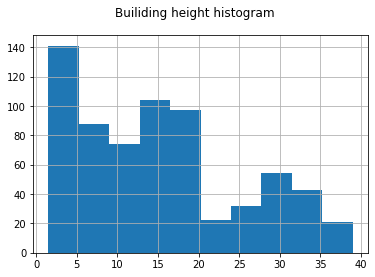

In [51]:
gadow_footprints_mapped['avg_height'].hist()
plt.suptitle("Builiding height histogram")

In [23]:
gadow_footprints_mapped['area'] = gadow_footprints_mapped.area

c:\users\askib\pycharmprojects\mobility\venv\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Text(0.5, 0.98, 'Area histogram')

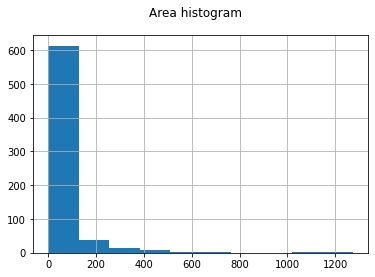

In [52]:
(gadow_footprints_mapped['area'] * 1_000_000_000 ).hist()
plt.suptitle("Area histogram")

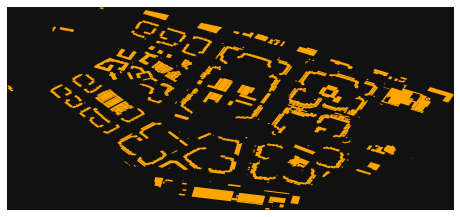

In [25]:
fig, ax = ox.plot_footprints(gadow_footprints_mapped, dpi=400, close=True)

In [47]:
# Check how are OSM and BIP data correlated
dr = gadow_footprints_mapped.height.dropna().index.tolist()
gadow_footprints_mapped.loc[dr, ["height","avg_height"]]

,height,avg_height
0,3.15,2.5
6,11.74,11.0
19,2.56,2.0
44,13.52,13.0
48,11.0,11.0
85,3.94,3.0
94,6,12.0
116,7.64,7.0
173,3.62,3.0
194,3.27,3.0


In [26]:
LEVEL_HEIGHT = 2.5
FLAT_SURFACE = 50

In [27]:
gadow_footprints_mapped["flat_count"] = ((gadow_footprints_mapped['area'] * 1_000_000_000 / FLAT_SURFACE)\
 * (gadow_footprints_mapped.avg_height / LEVEL_HEIGHT)).round().astype(int) + 1
                                            

c:\users\askib\pycharmprojects\mobility\venv\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Text(0.5, 0.98, 'Flats histogram')

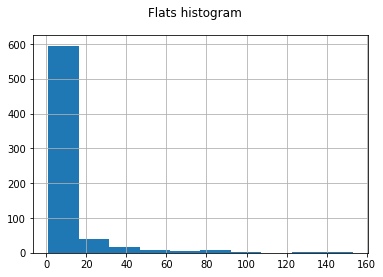

In [50]:
import matplotlib.pyplot as plt
gadow_footprints_mapped["flat_count"].hist()
plt.suptitle("Flats histogram")



In [29]:
gadow_footprints_mapped["flat_count"].value_counts()

1     315
2      73
4      40
3      38
7      21
     ... 
43      1
42      1
40      1
35      1
33      1
Name: flat_count, Length: 64, dtype: int64

In [30]:
gadow_footprints_mapped.to_file('gadow_footprints_mapped.gpkg', driver='GPKG')

In [31]:
gadow_flow_matrix

,Unnamed: 0,travel_id,lat,long,time,mean_of_transport,geometry
0,0,798a9138-afb4-4599-a4a4-b953673a6586,16.963825,51.126405,2019-10-27 07:40:00,Pieszo,POINT (16.96383 51.12640)
1,1,798a9138-afb4-4599-a4a4-b953673a6586,16.960701,51.127634,2019-10-27 07:48:00,Pieszo,POINT (16.96070 51.12763)
2,2,5e3a9ce9-2285-41d5-a395-a483adbc45f6,16.957725,51.126554,2019-10-08 05:00:00,Samochód osobowy jako kierowca,POINT (16.95773 51.12655)
4,4,9cd2247e-4c96-4d73-b81c-7ee752b099ae,16.969748,51.126558,2019-10-27 18:30:00,Samochód osobowy jako kierowca,POINT (16.96975 51.12656)
8,8,bf7ad7dd-c470-41da-88d4-fc6d9543d592,16.960303,51.123743,2019-11-05 07:30:59,Komunikacja autobusowa,POINT (16.96030 51.12374)
...,...,...,...,...,...,...,...
2526,2526,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.962703,51.127734,2019-11-15 17:00:00,Pieszo,POINT (16.96270 51.12773)
2527,2527,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.961556,51.122530,2019-11-15 17:08:00,Pieszo,POINT (16.96156 51.12253)
2528,2528,027104a6-3a2a-448b-9f11-0eed85be3041,16.961556,51.122530,2019-11-15 17:57:00,Komunikacja autobusowa,POINT (16.96156 51.12253)
2531,2531,76a23f02-b739-4f14-875d-e9c99eea3a94,16.959260,51.126316,2019-11-08 00:15:00,Komunikacja autobusowa,POINT (16.95926 51.12632)


In [32]:
gadow_flow_matrix['building_id'] = -1

In [33]:
def map_points_to_polygons(points, footprints):
     for i_p, point in points.iterrows():
        for i_f, footprint in footprints.iterrows():
            if point['geometry'].within(footprint['geometry']):
                points.at[i_p, 'building_id'] = i_f
     return points


In [34]:
gadow_flows_by_buildings = map_points_to_polygons(gadow_flow_matrix, gadow_footprints_mapped)

In [35]:
gadow_flow_mapped = gadow_flows_by_buildings.loc[gadow_flows_by_buildings['building_id'] != -1]

In [36]:
unique_stops = gadow_flow_mapped['building_id'].unique()

In [39]:
gadow_unique_stops = gadow_footprints_mapped.loc[unique_stops]

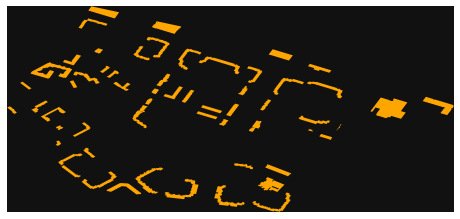

In [37]:
fig, ax = ox.plot_footprints(gadow_footprints_mapped.loc[unique_stops], dpi=400, close=True)

<AxesSubplot:>

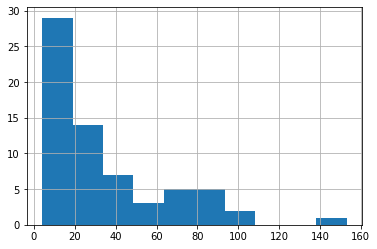

In [40]:

gadow_unique_stops['flat_count'].hist()

In [46]:
gadow_flow_mapped.to_csv('gadow_flow_mapped.csv')

In [42]:
gadow_footprints_mapped.to_csv('gadow_footprints_mapped')

,unique_id,osmid,element_type,amenity,wheelchair,name,shop,WroclawGIS:addr:date,WroclawGIS:addr:id,WroclawGIS:addr:layer,...,shelter_type,roof:levels,ways,type,geometry,height_sum,points_count,avg_height,area,flat_count
0,way/101347074,101347074,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.97296 51.12343, 16.97289 51.12333...",5,2,2.500,8.011580e-09,1
1,way/101347111,101347111,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.96973 51.12684, 16.96970 51.12680...",3,1,3.000,3.034365e-09,1
2,way/101347120,101347120,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.96193 51.12768, 16.96194 51.12768...",17,1,17.000,4.902548e-08,8
3,way/101347209,101347209,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.97286 51.12435, 16.97283 51.12430...",3,1,3.000,4.972210e-09,1
4,way/101347223,101347223,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.97230 51.12553, 16.97229 51.12552...",7,1,7.000,2.585990e-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,way/845357478,845357478,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.97154 51.12230, 16.97151 51.12225...",41,5,8.200,6.573234e-08,5
810,way/845361412,845361412,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.96835 51.12311, 16.96836 51.12313...",207,8,25.875,2.377747e-07,50
811,way/846008339,846008339,way,None,None,None,None,None,None,None,...,None,None,None,None,"POLYGON ((16.96845 51.12400, 16.96844 51.12398...",33,3,11.000,1.014359e-07,10
812,relation/1445702,1445702,relation,None,None,None,None,None,None,None,...,None,None,"[101430355, 101419736]",multipolygon,"POLYGON ((16.97734 51.12642, 16.97732 51.12642...",6,1,6.000,3.075378e-08,2


In [45]:

pd.read_csv('gadow_flow_mapped')

,Unnamed: 0,Unnamed: 0.1,travel_id,lat,long,time,mean_of_transport,geometry,building_id
0,0,0,798a9138-afb4-4599-a4a4-b953673a6586,16.963825,51.126405,2019-10-27 07:40:00,Pieszo,POINT (16.9638253 51.1264047),414
1,1,1,798a9138-afb4-4599-a4a4-b953673a6586,16.960701,51.127634,2019-10-27 07:48:00,Pieszo,POINT (16.9607009 51.1276341),445
2,2,2,5e3a9ce9-2285-41d5-a395-a483adbc45f6,16.957725,51.126554,2019-10-08 05:00:00,Samochód osobowy jako kierowca,POINT (16.9577253 51.1265541),210
3,4,4,9cd2247e-4c96-4d73-b81c-7ee752b099ae,16.969748,51.126558,2019-10-27 18:30:00,Samochód osobowy jako kierowca,POINT (16.9697476 51.12655770000001),521
4,8,8,bf7ad7dd-c470-41da-88d4-fc6d9543d592,16.960303,51.123743,2019-11-05 07:30:59,Komunikacja autobusowa,POINT (16.9603031 51.1237427),670
...,...,...,...,...,...,...,...,...,...
276,2516,2516,c8ac261c-863f-40bf-b9d3-2687243ed212,16.965530,51.130364,2019-11-08 19:00:00,Tramwaj,POINT (16.9655298 51.1303644),684
277,2519,2519,a368837e-40e2-4a8f-b6d2-f19df3637ef1,16.962703,51.127734,2019-11-15 16:43:00,Pieszo,POINT (16.9627026 51.12773370000001),292
278,2521,2521,58b4a090-23bd-4cef-9dc0-eb092509d473,16.961909,51.129431,2019-10-25 19:33:00,Samochód osobowy jako pasażer,POINT (16.9619089 51.12943129999999),586
279,2526,2526,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.962703,51.127734,2019-11-15 17:00:00,Pieszo,POINT (16.9627026 51.12773370000001),292
